# CASEBASED 2 MACHINE LEARNING - NAUFAL ADRIAN HIDAYAT (1301204056)

## Import Library

In [44]:
import pandas as pd
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Read Data

Import Data dan Baca file Soal

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/Naufalz16/CaseBased2/main/Country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [46]:
print(df.info(), "\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None 

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    

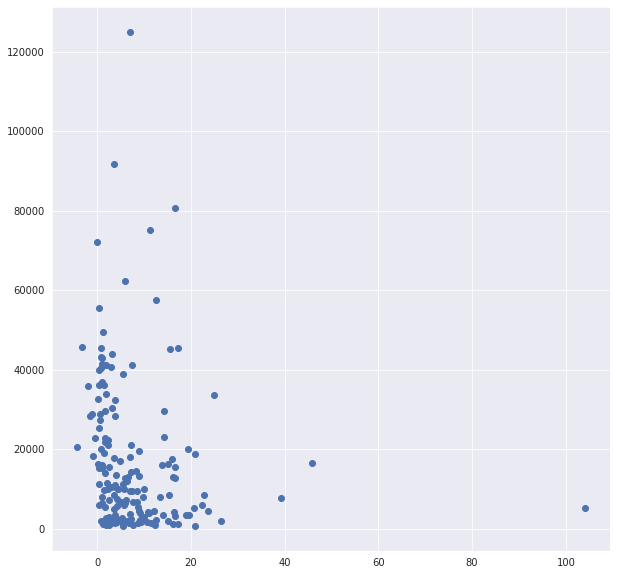

In [47]:
plt.scatter(df['inflation'], df['income'],)

## Pre Processing


### Change type data column float to int

In [48]:
df['child_mort'] = df['child_mort'].astype(int)
df['exports'] = df['exports'].astype(int)
df['health'] = df['health'].astype(int)
df['imports'] = df['imports'].astype(int)
df['inflation'] = df['inflation'].astype(int)
df['life_expec'] = df['life_expec'].astype(int)
df['total_fer'] = df['total_fer'].astype(int)

collum = list(df.columns)
collum.remove('country')
categoricalData = ['country']
NumericData = [*collum]
print("Categorical : ", *categoricalData)
print("Numeric : ", *NumericData, "\n")
df.info()

Categorical :  country
Numeric :  child_mort exports health imports income inflation life_expec total_fer gdpp 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     167 non-null    object
 1   child_mort  167 non-null    int64 
 2   exports     167 non-null    int64 
 3   health      167 non-null    int64 
 4   imports     167 non-null    int64 
 5   income      167 non-null    int64 
 6   inflation   167 non-null    int64 
 7   life_expec  167 non-null    int64 
 8   total_fer   167 non-null    int64 
 9   gdpp        167 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 13.2+ KB


### Check Null/Nan Data Value

In [49]:
#hitung data berisi NAN memakai looping 
missing_Value = df.isnull()
for column in missing_Value.columns.values.tolist():
  print(column)
  print(missing_Value[column].value_counts())
  print(" ") #True untuk tipe data NaN
  
df = df.drop('country',axis=1) #Drop column country

country
False    167
Name: country, dtype: int64
 
child_mort
False    167
Name: child_mort, dtype: int64
 
exports
False    167
Name: exports, dtype: int64
 
health
False    167
Name: health, dtype: int64
 
imports
False    167
Name: imports, dtype: int64
 
income
False    167
Name: income, dtype: int64
 
inflation
False    167
Name: inflation, dtype: int64
 
life_expec
False    167
Name: life_expec, dtype: int64
 
total_fer
False    167
Name: total_fer, dtype: int64
 
gdpp
False    167
Name: gdpp, dtype: int64
 


### Cek Duplikasi Data

In [50]:
print('Jumlah data duplikat : ', df.duplicated().sum())

Jumlah data duplikat :  0


## Cek Outlier

Mengecek banyaknya pencilan data pada column

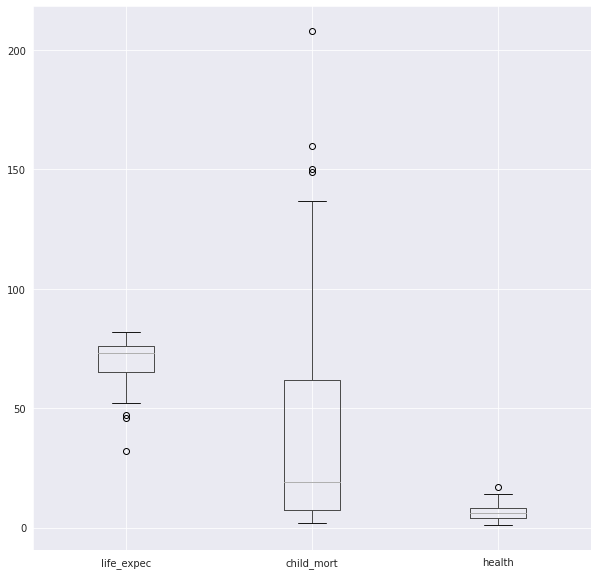

In [51]:
boxplot = df.boxplot(column = ['life_expec','child_mort' , 'health'])

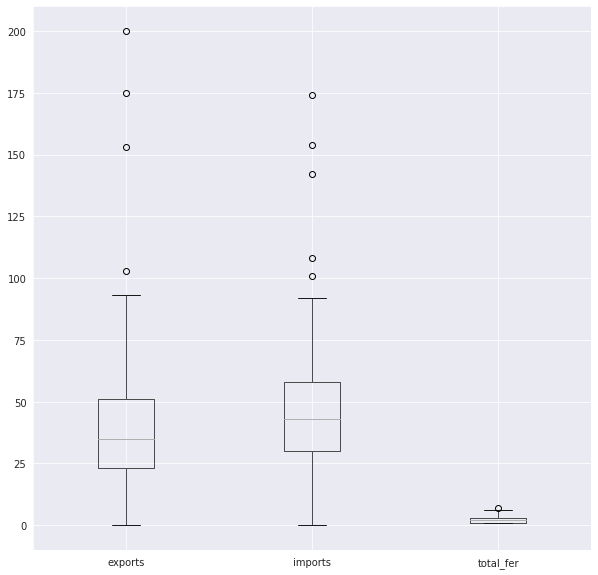

In [52]:
boxplot = df.boxplot(column = ['exports', 'imports', 'total_fer'])

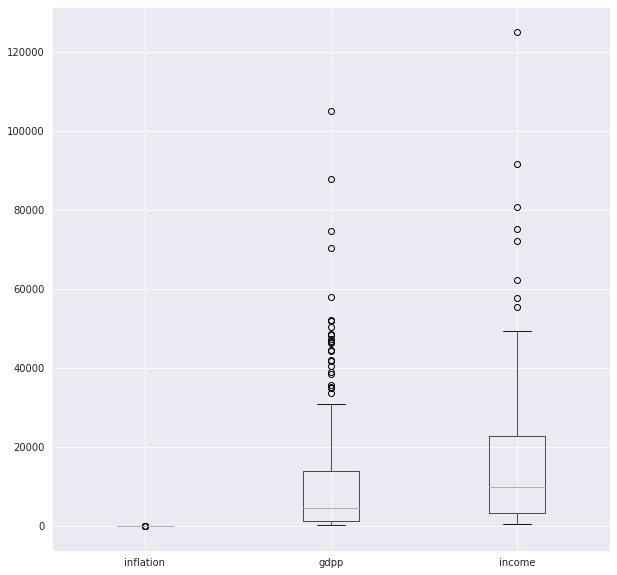

In [53]:
boxplot = df.boxplot(column = ['inflation', 'gdpp', 'income'])

Kolom ['gdpp'] dan ['income'] mempunyai banyak pencilan, maka harus ditangani terlebih dahulu

### Outliers Handlers

In [54]:
# Rumus Menghitung Jarak Interquartile
'''Metode ini memakai nilai quartil 1,2 dan 3 yang akan membagi sebuah urutan
data menjadi empat bagian. Data-data pencilan dapat ditentukan dengan nilai yang kurang
dari 1.5*IQR (selisih antara quartil 1 dan quartil 3) terhadap quartil 1,
dan nilai yang lebih dari 1.5*IQR terhadap quartil 3'''
def interquartile(df,x):
  q1 = (df[x]).quantile(0.25)
  q3 = (df[x]).quantile(0.75) 
  iqr = q3 - q1 #range dari q3 - q1
  max = q3 + (1.5 *iqr)
  min = q1 - (1.5 *iqr)
  return max, min

### Testing dan Replace Column GDPP

In [55]:
#Test untuk column GDPP
max, min = interquartile(df,'gdpp')
print('maximum: ',max,' | minimum:',min)

maximum:  33130.0  | minimum: -17750.0


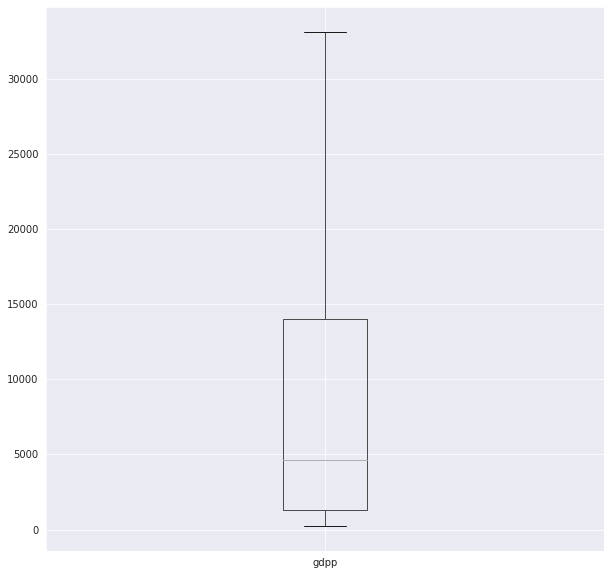

In [56]:
#Replacing outliers
def replace_outliers(df, x, max, min):
  more_than = (df[x] > max)
  less_than = (df[x] < min)
  df[x] = df[x].mask(more_than, max,axis=0)
  df[x] = df[x].mask(less_than, min,axis=0)
  return df
max, min = interquartile(df,'gdpp')
df = replace_outliers(df,'gdpp', max, min)
boxplot = df.boxplot(column=['gdpp'])

### Testing dan Replace Column Income

In [57]:
#Test untuk column Income
max, min = interquartile(df,'income')
print('maximum: ',max,' | minimum:',min)

maximum:  51967.5  | minimum: -25812.5


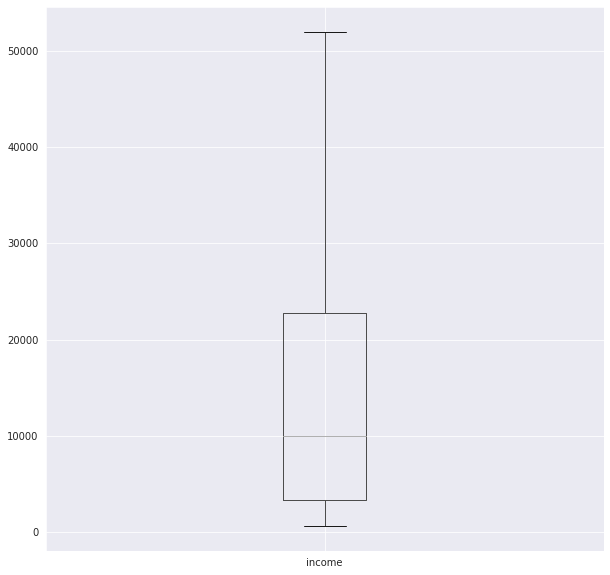

In [58]:
#Replacing outliers
def replace_outliers(df, x, max, min):
  more_than = (df[x] > max)
  less_than = (df[x] < min)
  df[x] = df[x].mask(more_than, max,axis=0)
  df[x] = df[x].mask(less_than, min,axis=0)
  return df
max, min = interquartile(df,'income')
df = replace_outliers(df,'income', max, min)
boxplot = df.boxplot(column=['income'])

### Testing dan Replace Column Inflation

In [59]:
#Test untuk column Inflation
max, min = interquartile(df,'inflation')
print('maximum: ',max,' | minimum:',min)

maximum:  23.5  | minimum: -12.5


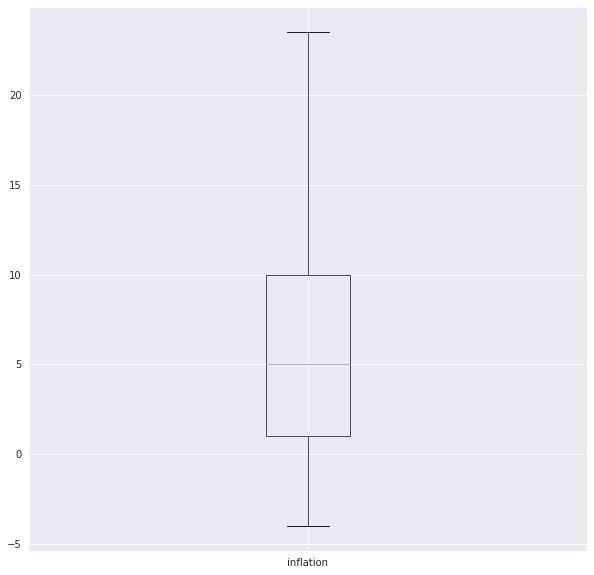

In [60]:
#Replacing outliers
def replace_outliers(df, x, max, min):
  more_than = (df[x] > max)
  less_than = (df[x] < min)
  df[x] = df[x].mask(more_than, max,axis=0)
  df[x] = df[x].mask(less_than, min,axis=0)
  return df
max, min = interquartile(df,'inflation')
df = replace_outliers(df,'inflation', max, min)
boxplot = df.boxplot(column=['inflation'])

### Testing dan Replace Column Exports

In [61]:
#Test untuk column Exports
max, min = interquartile(df,'exports')
print('maximum: ',max,' | minimum:',min)

maximum:  93.0  | minimum: -19.0


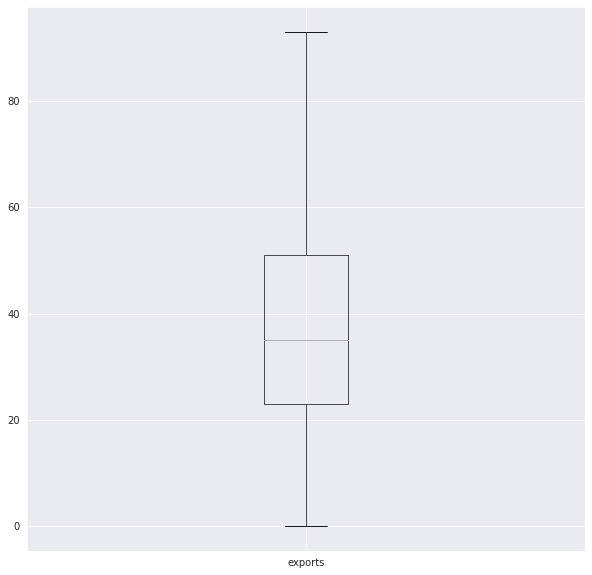

In [62]:
#Replacing outliers
def replace_outliers(df, x, max, min):
  more_than = (df[x] > max)
  less_than = (df[x] < min)
  df[x] = df[x].mask(more_than, max,axis=0)
  df[x] = df[x].mask(less_than, min,axis=0)
  return df
max, min = interquartile(df,'exports')
df = replace_outliers(df,'exports', max, min)
boxplot = df.boxplot(column=['exports'])

### Testing dan Replace Column Imports

In [63]:
#Test untuk column Imports
max, min = interquartile(df,'imports')
print('maximum: ',max,' | minimum:',min)

maximum:  100.0  | minimum: -12.0


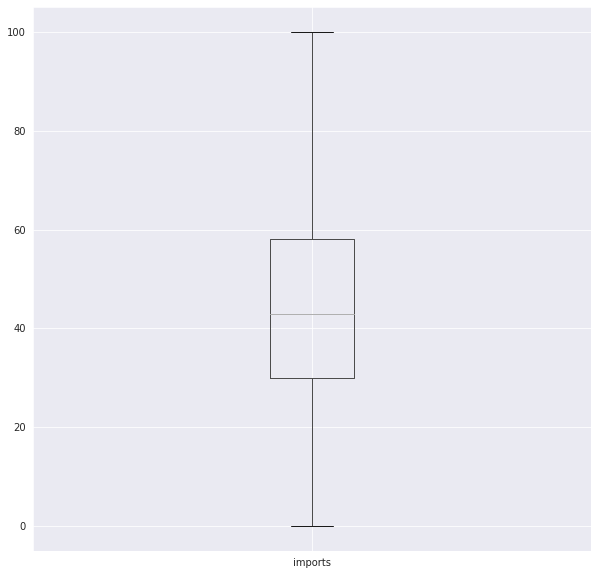

In [64]:
#Replacing outliers
def replace_outliers(df, x, max, min):
  more_than = (df[x] > max)
  less_than = (df[x] < min)
  df[x] = df[x].mask(more_than, max,axis=0)
  df[x] = df[x].mask(less_than, min,axis=0)
  return df
max, min = interquartile(df,'imports')
df = replace_outliers(df,'imports', max, min)
boxplot = df.boxplot(column=['imports'])

### Testing dan Replace Column Child_mort

In [65]:
#Test untuk column child_mort
max, min = interquartile(df,'child_mort')
print('maximum: ',max,' | minimum:',min)

maximum:  143.75  | minimum: -74.25


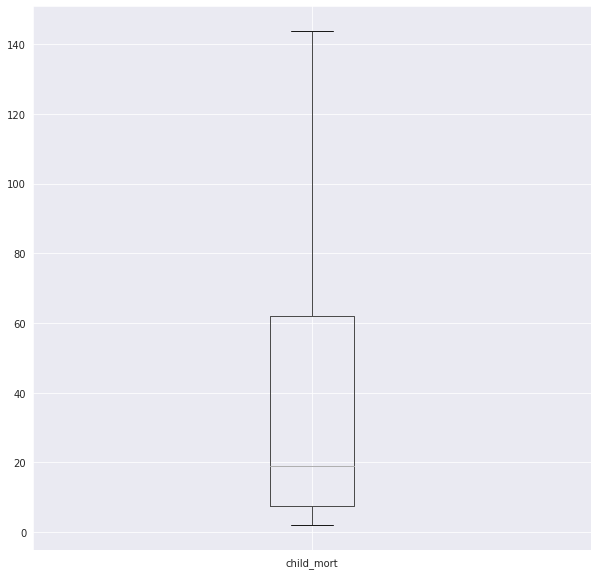

In [66]:
#Replacing outliers
def replace_outliers(df, x, max, min):
  more_than = (df[x] > max)
  less_than = (df[x] < min)
  df[x] = df[x].mask(more_than, max,axis=0)
  df[x] = df[x].mask(less_than, min,axis=0)
  return df
max, min = interquartile(df,'child_mort')
df = replace_outliers(df,'child_mort', max, min)
boxplot = df.boxplot(column=['child_mort'])

### Testing dan Replace Column Life_Expec

In [67]:
#Test untuk column Life_Expec
max, min = interquartile(df,'life_expec')
print('maximum: ',max,' | minimum:',min)

maximum:  92.5  | minimum: 48.5


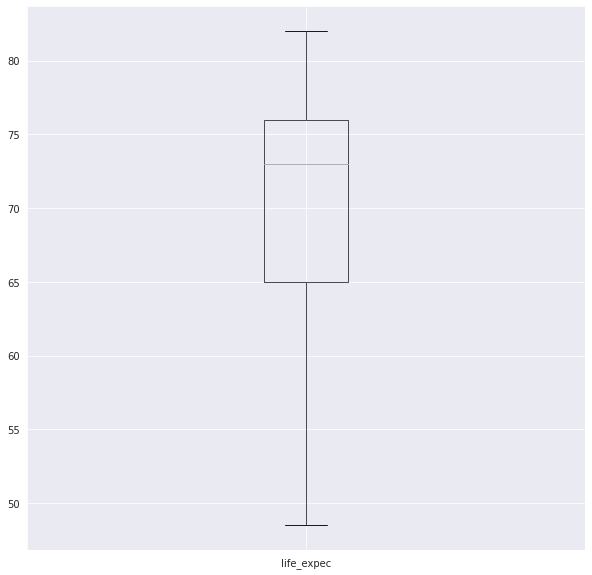

In [68]:
#Replacing outliers
def replace_outliers(df, x, max, min):
  more_than = (df[x] > max)
  less_than = (df[x] < min)
  df[x] = df[x].mask(more_than, max,axis=0)
  df[x] = df[x].mask(less_than, min,axis=0)
  return df
max, min = interquartile(df,'life_expec')
df = replace_outliers(df,'life_expec', max, min)
boxplot = df.boxplot(column=['life_expec'])

### Testing dan Replace Column Total_Fer

In [69]:
#Test untuk column Total_Fer
max, min = interquartile(df,'total_fer')
print('maximum: ',max,' | minimum:',min)

maximum:  6.0  | minimum: -2.0


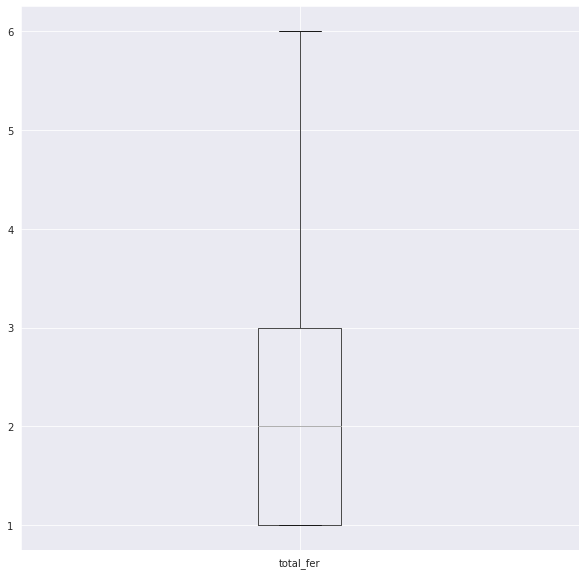

In [70]:
#Replacing outliers
def replace_outliers(df, x, max, min):
  more_than = (df[x] > max)
  less_than = (df[x] < min)
  df[x] = df[x].mask(more_than, max,axis=0)
  df[x] = df[x].mask(less_than, min,axis=0)
  return df
max, min = interquartile(df,'total_fer')
df = replace_outliers(df,'total_fer', max, min)
boxplot = df.boxplot(column=['total_fer'])

### Testing dan Replace Column Health

In [71]:
#Test untuk column Health
max, min = interquartile(df,'health')
print('maximum: ',max,' | minimum:',min)

maximum:  14.0  | minimum: -2.0


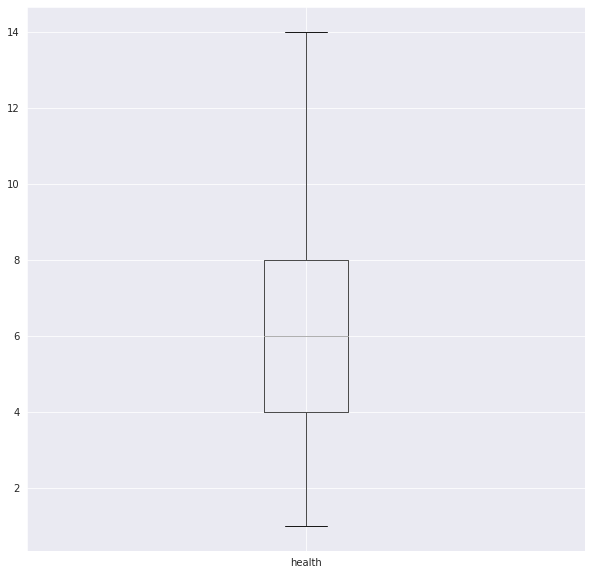

In [72]:
#Replacing outliers
def replace_outliers(df, x, max, min):
  more_than = (df[x] > max)
  less_than = (df[x] < min)
  df[x] = df[x].mask(more_than, max,axis=0)
  df[x] = df[x].mask(less_than, min,axis=0)
  return df
max, min = interquartile(df,'health')
df = replace_outliers(df,'health', max, min)
boxplot = df.boxplot(column=['health'])

## Cek Korelasi Antara Column

In [73]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.0,10.0,7.0,44.0,1610.0,9.0,56.0,5.0,553.0
1,16.0,28.0,6.0,48.0,9930.0,4.0,76.0,1.0,4090.0
2,27.0,38.0,4.0,31.0,12900.0,16.0,76.0,2.0,4460.0
3,119.0,62.0,2.0,42.0,5900.0,22.0,60.0,6.0,3530.0
4,10.0,45.0,6.0,58.0,19100.0,1.0,76.0,2.0,12200.0
...,...,...,...,...,...,...,...,...,...
162,29.0,46.0,5.0,52.0,2950.0,2.0,63.0,3.0,2970.0
163,17.0,28.0,4.0,17.0,16500.0,23.5,75.0,2.0,13500.0
164,23.0,72.0,6.0,80.0,4490.0,12.0,73.0,1.0,1310.0
165,56.0,30.0,5.0,34.0,4480.0,23.0,67.0,4.0,1310.0


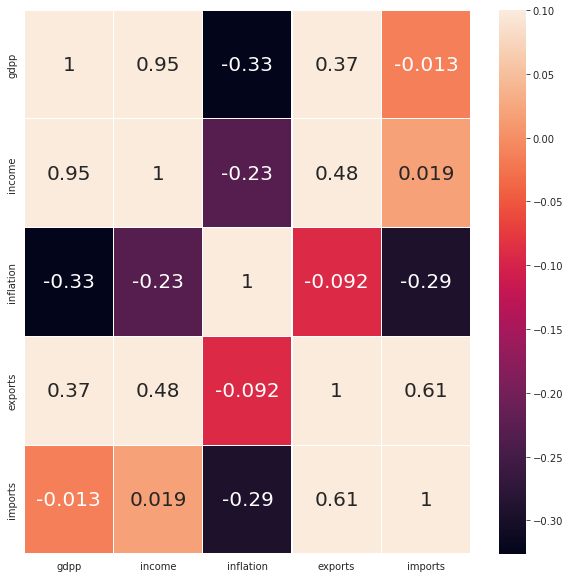

In [74]:
#hanya menampilkan korelasi data trade dan data finance
df_korelasi = df[['gdpp','income','inflation','exports','imports']].corr()
sns.set({'figure.figsize':(10,10)})
sns.heatmap(df_korelasi, linewidths=.10, vmax=0.1, annot=True, annot_kws={"fontsize":20})

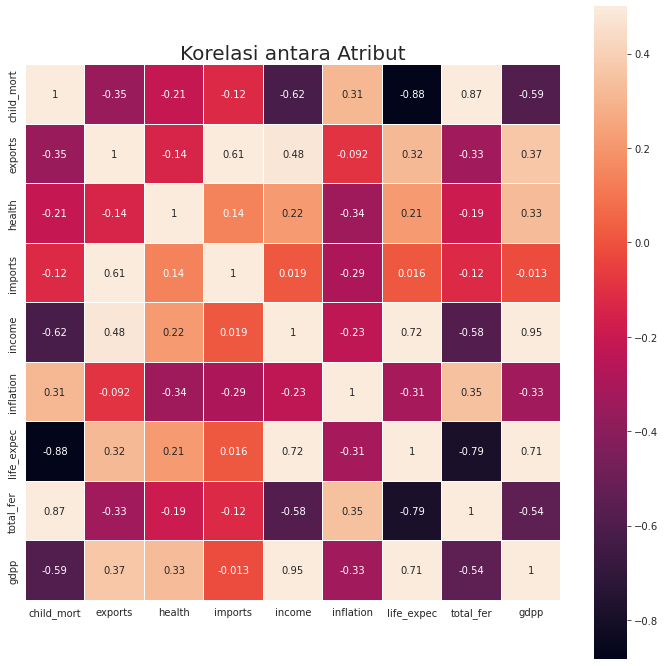

In [75]:
korelasi = df.corr()
plt.figure(figsize=(12, 12))
sns.color_palette(as_cmap=True)
sns.heatmap(df.corr(), vmax=0.5, linewidths=0.05, square=True, annot=True)
plt.title('Korelasi antara Atribut', y=1, size=20)
plt.show()

## Split Data
Value Column yang sangat berpengaruh dengan label :

[gdpp, inflation] = -0.33 (Paling Kecil) &
[gdpp, income] = 0.95 (Paling Besar)

In [76]:
print(df)

     child_mort  exports  health  imports   income  inflation  life_expec  \
0          90.0     10.0     7.0     44.0   1610.0        9.0        56.0   
1          16.0     28.0     6.0     48.0   9930.0        4.0        76.0   
2          27.0     38.0     4.0     31.0  12900.0       16.0        76.0   
3         119.0     62.0     2.0     42.0   5900.0       22.0        60.0   
4          10.0     45.0     6.0     58.0  19100.0        1.0        76.0   
..          ...      ...     ...      ...      ...        ...         ...   
162        29.0     46.0     5.0     52.0   2950.0        2.0        63.0   
163        17.0     28.0     4.0     17.0  16500.0       23.5        75.0   
164        23.0     72.0     6.0     80.0   4490.0       12.0        73.0   
165        56.0     30.0     5.0     34.0   4480.0       23.0        67.0   
166        83.0     37.0     5.0     30.0   3280.0       14.0        52.0   

     total_fer     gdpp  
0          5.0    553.0  
1          1.0   4090.0

In [77]:
colorMap = ['pink','orange','green','red','purple','brown','blue','gray','olive','cyan','black']

In [78]:
y = 'income'
x = 'inflation'
df = df.loc[:,[x,y]]
df

,inflation,income
0,9.0,1610.0
1,4.0,9930.0
2,16.0,12900.0
3,22.0,5900.0
4,1.0,19100.0
...,...,...
162,2.0,2950.0
163,23.5,16500.0
164,12.0,4490.0
165,23.0,4480.0


## Start Scalling Data

In [79]:
#Scaling Manual (Normalisasi)
df['income'] = ((df['income']-df['income'].min()) / ((df['income'].max() - df['income'].min())))
df['inflation'] = ((df['inflation']-df['inflation'].min()) / ((df['inflation'].max() - df['inflation'].min())))
df

,inflation,income
0,0.472727,0.019490
1,0.290909,0.181489
2,0.727273,0.239318
3,0.945455,0.103021
4,0.181818,0.360038
...,...,...
162,0.218182,0.045582
163,1.000000,0.309413
164,0.581818,0.075567
165,0.981818,0.075372


### Visualisasi Persebaran Data [x, y]
Collum inflasi dengan income

Text(0, 0.5, 'income')

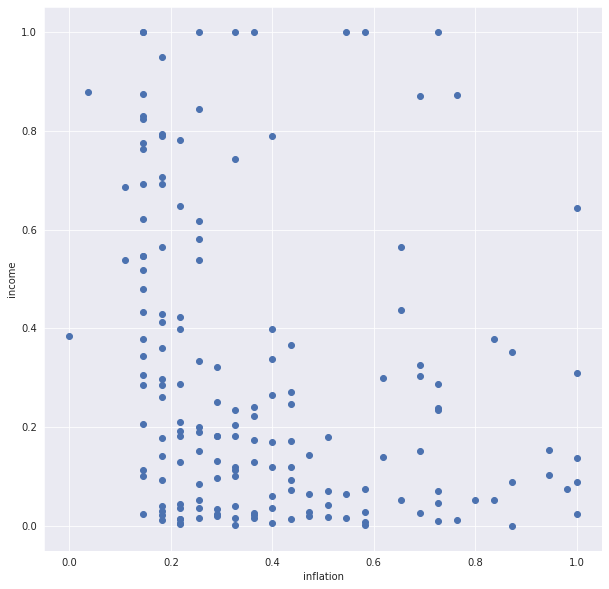

In [80]:
plt.scatter(df[x], df[y])
plt.xlabel(x)
plt.ylabel(y)

## Function KMEANS Cluster

### Inisiasi Centroid

In [81]:
def BuildCentroid(df,x,y,k):
  random.seed(50)
  centroids = {i + 1 : [random.choices(df[x]),random.choices(df[y])] for i in range(k)}
  return centroids

[[0.509090909090909], [0.8448650174751988]]
[[0.4], [0.04051909615740335]]


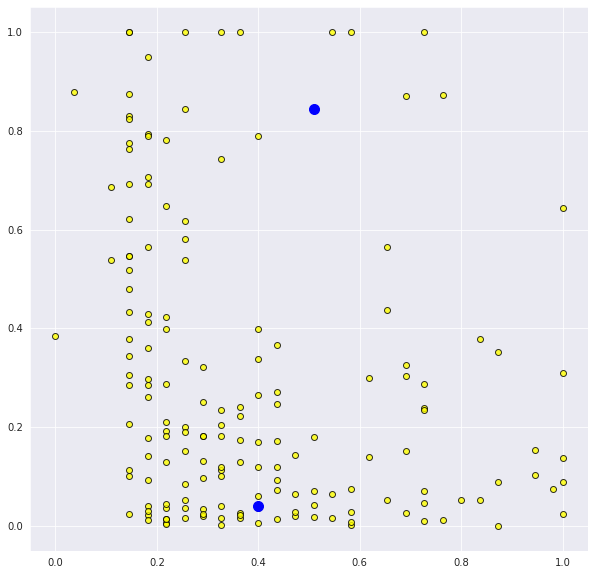

In [82]:
#Testing
k=2
cen = BuildCentroid(df, x, y, k)
for i in cen :
    print(cen[i])
plt.scatter(df[x], df[y], color='yellow', alpha=0.8, edgecolor='black')

for i in cen:
  plt.scatter(cen[i][0],cen[i][1],color='Blue', s=100)
plt.show()

### Menghitung Jarak

Menghitung jarak yang didapat dari centroid yang sudah ditentukan

In [83]:
def HitungJarak(df,x,y,centroid):
  for i in centroid.keys():
    #menambahkan kolom i(1,2,..,n) yaitu jarak antara objek x dan y dengan masing masing centroid
    df[str(i)] = np.sqrt((df[x] - centroid[i][0]) ** 2 + (df[y] - centroid[i][1]) ** 2) #Rumus Euclidean
  return df #jarak antara (umur, premi)[i] dg centroid
df2 = HitungJarak(df,x,y,cen)
df2

,inflation,income,1,2
0,0.472727,0.019490,0.826175,0.075706
1,0.290909,0.181489,0.698335,0.178251
2,0.727273,0.239318,0.643654,0.382921
3,0.945455,0.103021,0.860666,0.549024
4,0.181818,0.360038,0.584949,0.386905
...,...,...,...,...
162,0.218182,0.045582,0.850578,0.181889
163,1.000000,0.309413,0.726430,0.657498
164,0.581818,0.075567,0.772728,0.185165
165,0.981818,0.075372,0.903100,0.582861


### Membuat Keanggotaan

Membuat Keanggotaan berdasarkan nilai min masing2 atribut dengan centroid yang didapat

In [84]:
def df_anggota(df,centroid):
  '''menambahkan kolom "cluster index" yang berisi nilai MINIMUM dari masing-masing jarak 
  atribut dengan centroid. Contoh pada baris pertama, atribut income inflation dan gdpp 
  memiliki jarak paling dekat dengan centroid 3 sehingga index cluster nya adalah 3'''
  df['Cluster Index'] = (df.loc[:, ['{}'.format(i) for i in centroid.keys()]].idxmin(axis=1)).astype('int') 
  
  '''menambahkan kolom 'color' yang nantinya akan berguna untuk visualisasi data agar 
  tiap2 kluster objek memiliki warna yg seragam'''
  df['Warna'] = df['Cluster Index'].map(lambda x: colorMap[x])
  return df

df2 = df_anggota(df2,cen)
df2

,inflation,income,1,2,Cluster Index,Warna
0,0.472727,0.019490,0.826175,0.075706,2,green
1,0.290909,0.181489,0.698335,0.178251,2,green
2,0.727273,0.239318,0.643654,0.382921,2,green
3,0.945455,0.103021,0.860666,0.549024,2,green
4,0.181818,0.360038,0.584949,0.386905,2,green
...,...,...,...,...,...,...
162,0.218182,0.045582,0.850578,0.181889,2,green
163,1.000000,0.309413,0.726430,0.657498,2,green
164,0.581818,0.075567,0.772728,0.185165,2,green
165,0.981818,0.075372,0.903100,0.582861,2,green


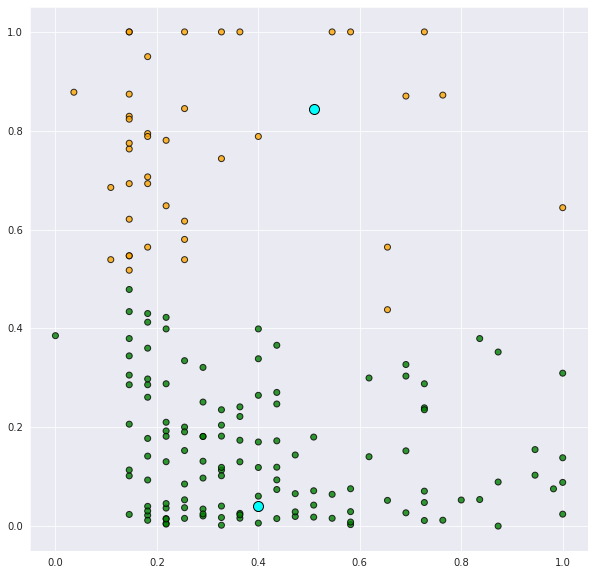

In [85]:
plt.scatter(df2[x], df2[y], color=df2['Warna'], alpha=0.8, edgecolor='black')
for i in cen:
  plt.scatter(cen[i][0], cen[i][1], color='cyan', edgecolor = "black", s=100)
plt.show()

### Menetukan sebuah Centroid Baru

In [86]:
def centroidBaru(df,centroid):
  for i in centroid.keys():
    centroid[i][0] = np.mean(df[df['Cluster Index'] == i][x])
    centroid[i][1] = np.mean(df[df['Cluster Index'] == i][y])
  return centroid

### Main Function KMEANS

In [87]:
def clusterisasi(df,x,y,k):
  centroid = BuildCentroid(df, x, y, k)
  df2 = copy.deepcopy(df)
  df2 = HitungJarak(df2, x, y, centroid)
  df2 = df_anggota(df2,centroid)
  centroid = centroidBaru(df2,centroid)
  while (True):
    oldcentroid = copy.deepcopy(centroid)
    df2 = HitungJarak(df2 ,x, y, centroid)
    df2 = df_anggota(df2, centroid)
    centroid = centroidBaru(df2, centroid)
    if (oldcentroid == centroid):
      break
  return (df2, centroid)

### Testing Hasil K = 2

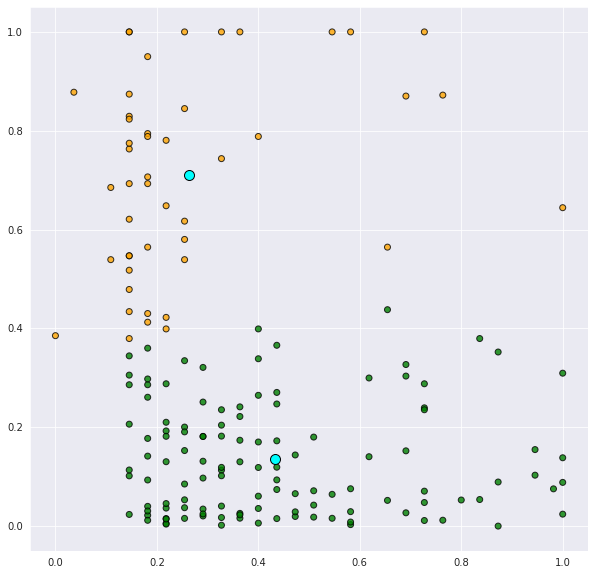

In [88]:
k=2
df2, centroid = clusterisasi(df,x,y,k)

plt.scatter(df2[x], df2[y], color=df2['Warna'], alpha=0.8, edgecolor='black')
for i in centroid:
  plt.scatter(*centroid[i],color='Cyan', edgecolor = 'black', s=100)
plt.show()

## Periksa Nilai K Terbaik memakai ELBOW METHOD

### Menghitung SSE

SSE = jumlah jarak kuadrat dari titik-titik yang ada ke pusat yang ditetapkan. (distorsi)

In [89]:
def HitungSSE(df,centroid):
  sum = 0
  for i in range(len(centroid)):
    j = i+1
    k = df[(df["Cluster Index"] == j)]['{}'.format(j)]**2
    sum += k.sum()
  return sum

### Menghitung WCSS

In [90]:
wcss = []
for i in range(10): 
  df2, centroid = clusterisasi(df, x, y, i+1)
  wcss.append(HitungSSE(df2, centroid))
  print('K =',i+1,'| Nilai Distorsi: ',wcss[i])

K = 1 | Nilai Distorsi:  24.238026873247478
K = 2 | Nilai Distorsi:  12.115347792273344
K = 3 | Nilai Distorsi:  6.594332802555964
K = 4 | Nilai Distorsi:  5.244579200348853
K = 5 | Nilai Distorsi:  3.8507301579004745
K = 6 | Nilai Distorsi:  3.335420254217777
K = 7 | Nilai Distorsi:  3.187254259806649
K = 8 | Nilai Distorsi:  2.555061968840885
K = 9 | Nilai Distorsi:  2.2142751228774866
K = 10 | Nilai Distorsi:  2.0745180159194607


### Grafik Elbow Mehtod

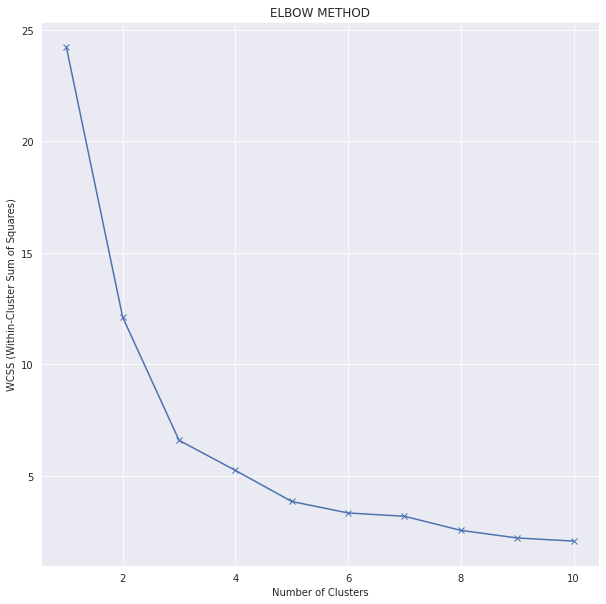

In [91]:
plt.plot(range(1, 11), wcss, '-bx')
plt.title('ELBOW METHOD')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

Jika dilihat dari grafik di atas, nilai K yang optimum ialah 3, 5, dan 7.

## Testing Hasil KMEANS = 3

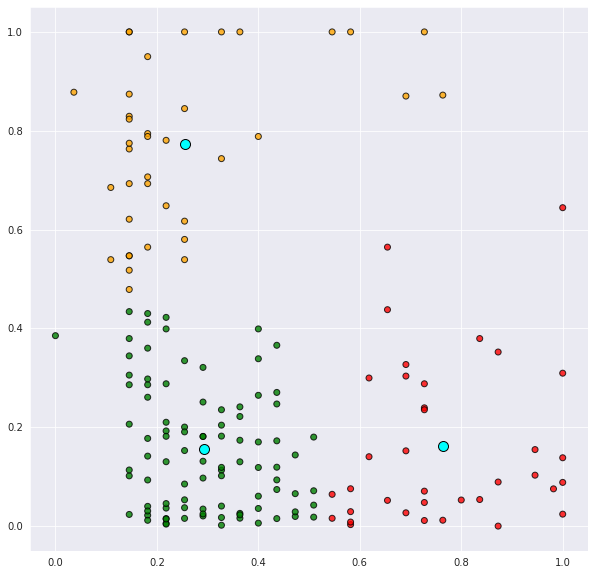

In [92]:
k=3
df2, centroid = clusterisasi(df,x,y,k)

plt.scatter(df2[x], df2[y], color=df2['Warna'], alpha=0.8, edgecolor='black')
for i in centroid:
  plt.scatter(*centroid[i],color='Cyan', edgecolor = 'black', s=100)
plt.show()

## Testing Hasil KMEANS = 4

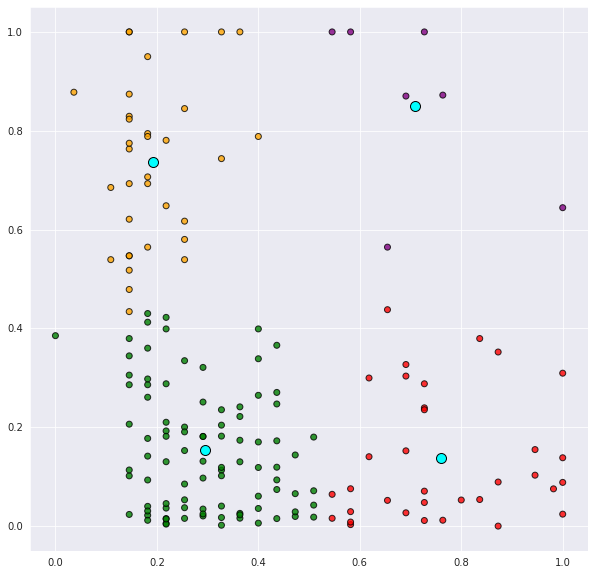

In [93]:
k=4
df2, centroid = clusterisasi(df,x,y,k)

plt.scatter(df2[x], df2[y], color=df2['Warna'], alpha=0.8, edgecolor='black')
for i in centroid:
  plt.scatter(*centroid[i],color='Cyan', edgecolor = 'black', s=100)
plt.show()

## Testing Hasil KMEANS = 5

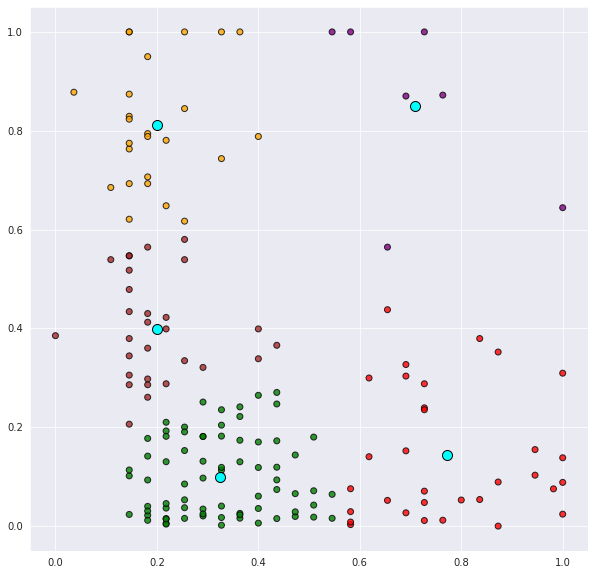

In [94]:
k=5
df2, centroid = clusterisasi(df,x,y,k)

plt.scatter(df2[x], df2[y], color=df2['Warna'], alpha=0.8, edgecolor='black')
for i in centroid:
  plt.scatter(*centroid[i],color='Cyan', edgecolor = 'black', s=100)
plt.show()

## Testing Hasil KMEANS = 6

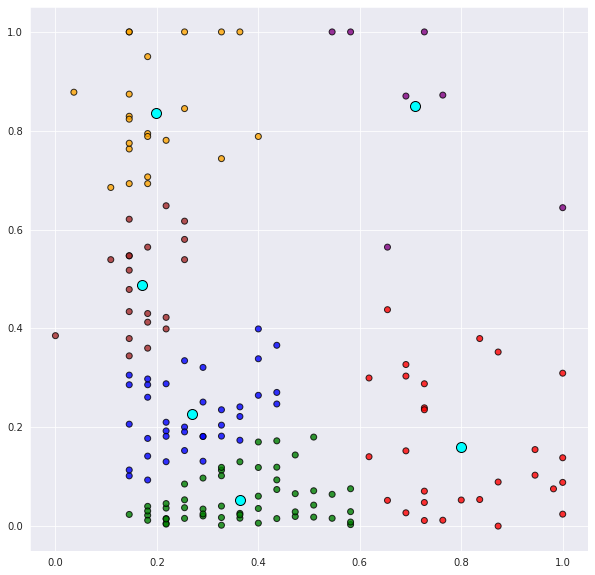

In [95]:
k=6
df2, centroid = clusterisasi(df,x,y,k)

plt.scatter(df2[x], df2[y], color=df2['Warna'], alpha=0.8, edgecolor='black')
for i in centroid:
  plt.scatter(*centroid[i],color='Cyan', edgecolor = 'black', s=100)
plt.show()

## Testing Hasil KMEANS = 7

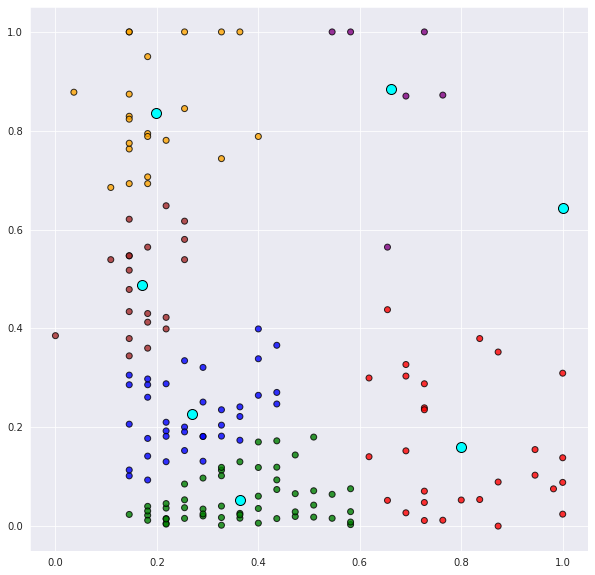

In [96]:
k=7
df2, centroid = clusterisasi(df,x,y,k)

plt.scatter(df2[x], df2[y], color=df2['Warna'], alpha=0.8, edgecolor='black')
for i in centroid:
  plt.scatter(*centroid[i],color='Cyan', edgecolor = 'black', s=100)
plt.show()

## Testing Hasil KMEANS = 8

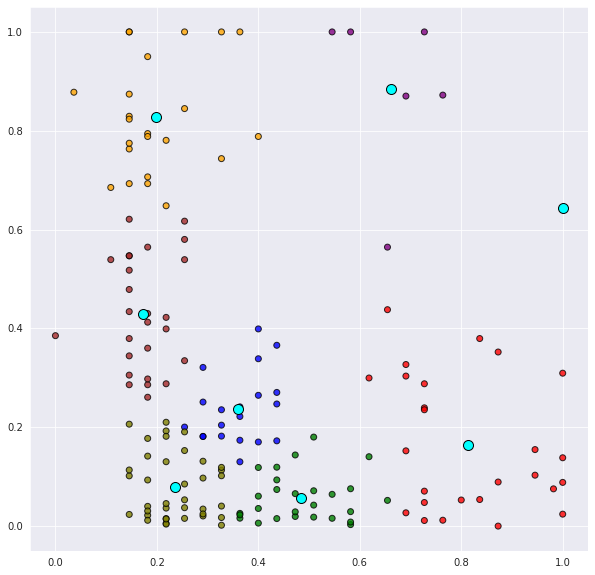

In [97]:
k=8
df2, centroid = clusterisasi(df,x,y,k)

plt.scatter(df2[x], df2[y], color=df2['Warna'], alpha=0.8, edgecolor='black')
for i in centroid:
  plt.scatter(*centroid[i],color='Cyan', edgecolor = 'black', s=100)
plt.show()

## Testing Hasil KMEANS = 9

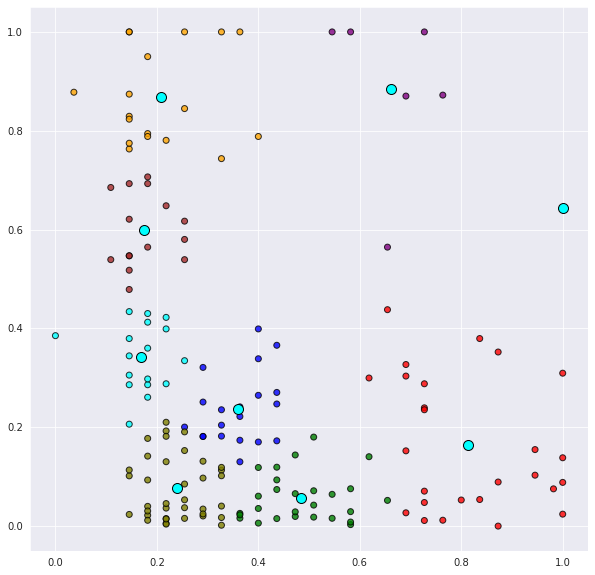

In [98]:
k=9
df2, centroid = clusterisasi(df,x,y,k)

plt.scatter(df2[x], df2[y], color=df2['Warna'], alpha=0.8, edgecolor='black')
for i in centroid:
  plt.scatter(*centroid[i],color='Cyan', edgecolor = 'black', s=100)
plt.show()

## Testing Hasil KMEANS = 10

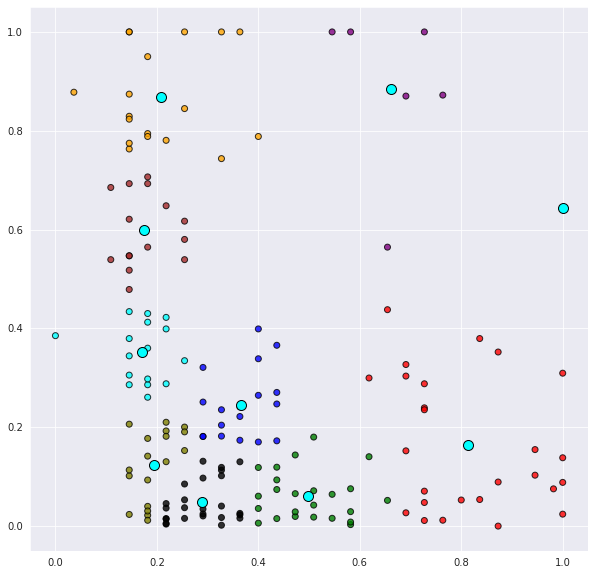

In [99]:
k=10
df2, centroid = clusterisasi(df,x,y,k)

plt.scatter(df2[x], df2[y], color=df2['Warna'], alpha=0.8, edgecolor='black')
for i in centroid:
  plt.scatter(*centroid[i],color='Cyan', edgecolor = 'black', s=100)
plt.show()